In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#import dtale
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
path = "C:\\Users\\krishna\\Downloads\\new_data.csv"

dat = pd.read_csv(path)

dat

,Permittivity,df1,df2,df3,df4,df5
0,9.4,0.4320,1.0890,1.8877,2.0340,0.7574
1,3.2,0.1620,0.4140,0.7409,0.7380,1.0904
2,5.0,0.2610,0.6660,1.1819,1.1970,1.2794
3,2.1,0.0900,0.2160,0.3809,1.5030,0.6944
4,6.5,0.3330,0.8370,1.4699,1.5120,1.8014
...,...,...,...,...,...,...
95,10.3,0.4088,1.0060,2.6028,2.5791,2.5403
96,11.4,0.4489,1.1060,2.8572,2.7829,2.7969
97,1.8,0.0984,0.2334,0.6372,1.0042,0.5011
98,1.5,0.0875,0.2061,0.5679,0.6420,0.5354


In [59]:
#Reading features IN X We need shifts of resonant feequency i.e. df1 	df2 	df3 	df4 	df5
X = dat.iloc[:,1:6].values.astype(float)

y = dat.iloc[:,0].values.astype(float)



In [4]:
# X, y, coef = make_regression(
#     n_samples=n_samples_train + n_samples_test,
#     n_features=n_features,
#     n_informative=50,
#     shuffle=False,
#     noise=1.0,
#     coef=True,
# )

In [60]:
#Spitting data 80 percfent training ND FOR testing 20 percent
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1010)


In [61]:
#Linear Regression 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_1 = linreg.predict(X_test)
y_1

array([ 3.8337887 ,  8.99370275, 12.09964197,  3.37143273,  1.96326362,
        3.04639427,  8.93300987,  5.42284874,  2.07833147,  9.88195142,
        8.2561251 ,  6.31318523,  8.5667158 ,  2.85833373,  7.99363563,
        7.17782843,  9.53637426,  1.82341335,  5.60372787,  2.2197842 ])

In [62]:
#Cross validation for modelEVALUATION using stratified k-fold

cv_1_results = cross_val_score(linreg, X, y, cv=10,scoring="r2") ##CROSSVALIDATION for LR
cv_1_results
print(np.mean(cv_1_results))
#AVEARGE R2 FOR LINEAR REGRESSION

0.8474647480402977


In [63]:
#AVEARGE RMSE FOR LINEAR REGRESSION
cv__results = cross_val_score(linreg, X, y, cv=10,scoring="neg_mean_squared_error") ##CROSSVALIDATION for LR
cv__results
print(np.mean(cv__results)*(-1))

0.6713445851871878


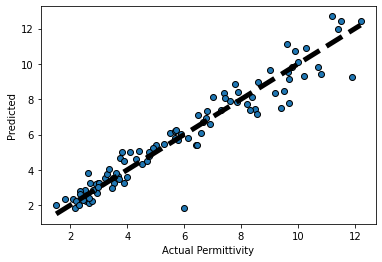

In [67]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
ax.set_xlabel("Actual Permittivity")
ax.set_ylabel("Predicted")
plt.show()



In [14]:
#RandomForestREgressor
rf = RandomForestRegressor(n_estimators=10, n_jobs=-1)
rf.fit(X_train, y_train)
y_2 = rf.predict(X_test)

In [15]:
#Cross validation for modelEVALUATION using stratified k-fold  ---- FOR random forest REGRESSOR
cv_2_results = cross_val_score(rf, X, y, cv=10,scoring="r2")
print(np.mean(cv_2_results))


0.82950578396604


In [16]:
#AVEARGE RMSE FOR RANDOM FOREST 
cv_2_rmse = cross_val_score(rf, X, y, cv=10,scoring="neg_mean_squared_error")
print(np.mean(cv_2_rmse)*-1)

0.84995482


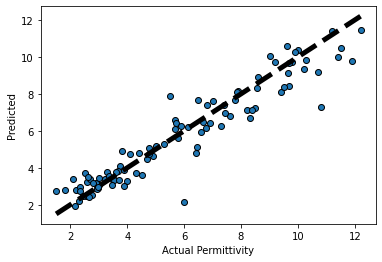

[1.5, 12.2] [1.5, 12.2]


In [201]:
predicted = cross_val_predict(rf, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
ax.set_xlabel("Actual Permittivity")
ax.set_ylabel("Predicted")
plt.show()
print([y.min(), y.max()], [y.min(), y.max()])

In [18]:
#DECISION TREE REGRESSOR
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)
y_3= regr_2.predict(X_test)

cv_3_rmse = cross_val_score(regr_2, X, y, cv=10,scoring="neg_mean_squared_error")
print(np.mean(cv_3_rmse)*-1)

1.6590750929157416


In [19]:
cv_3_r2 = cross_val_score(rf, X, y, cv=10,scoring="r2")
print(np.mean(cv_3_r2))


0.835373437036725


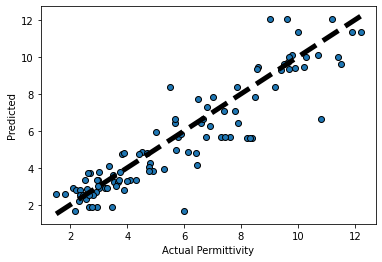

array([ 9.4 ,  3.2 ,  5.  ,  2.1 ,  6.5 ,  3.  , 12.2 , 10.  ,  3.5 ,
        5.5 ,  8.6 ,  2.5 ,  2.6 ,  2.98,  4.1 ,  4.3 ,  4.5 ,  6.15,
       10.2 ,  2.94,  2.2 ,  2.33,  2.17,  5.68,  4.  ,  4.8 ,  6.  ,
        7.9 ,  2.31,  3.87,  2.91,  2.55,  2.7 ,  3.3 ,  3.35,  3.8 ,
        4.4 ,  2.62,  5.7 ,  6.8 ,  7.  ,  9.  ,  9.6 ,  3.75, 11.2 ,
        3.02,  6.6 , 10.8 ,  3.55,  3.66,  6.4 ,  3.7 ,  3.45,  2.64,
        2.95,  2.75,  6.45, 10.7 ,  4.7 ,  9.8 ,  9.9 , 11.9 ,  2.8 ,
        2.35,  2.97,  2.45,  2.65,  3.9 ,  4.78,  5.8 ,  6.9 ,  8.2 ,
        8.5 ,  5.3 ,  8.55,  9.7 ,  9.66,  8.4 ,  8.3 ,  3.6 ,  4.9 ,
        4.75,  6.75,  7.3 ,  7.4 ,  7.6 ,  7.8 ,  7.45, 11.5 ,  9.5 ,
        9.2 ,  9.68,  5.66,  6.66,  7.86, 10.3 , 11.4 ,  1.8 ,  1.5 ,
        5.9 ])

In [199]:
predicted = cross_val_predict(regr_2, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
ax.set_xlabel("Actual Permittivity")
ax.set_ylabel("Predicted")
plt.show()
y

In [ ]:
from sklearn.svm import SVR


In [27]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [83]:
svr_rbf.fit(X_train, y_train)
y_5= svr_rbf.predict(X_test)

cv_5_rmse = cross_val_score(svr_rbf, X, y, cv=10,scoring="neg_mean_squared_error")
print(np.mean(cv_5_rmse)*-1)

0.7349526149842143


In [84]:
cv_5_r2 = cross_val_score(svr_rbf, X, y, cv=10,scoring="r2")
print(np.mean(cv_5_r2))


0.8603951303462509


In [85]:
svr_lin.fit(X_train, y_train)
y_6= svr_lin.predict(X_test)

cv_6_rmse = cross_val_score(svr_lin, X, y, cv=10,scoring="neg_mean_squared_error")
print(np.mean(cv_6_rmse)*-1)

0.6153016071794357


In [86]:
cv_6_r2 = cross_val_score(svr_lin, X, y, cv=10,scoring="r2")
print(np.mean(cv_6_r2))

0.8658590938527695


In [87]:
svr_poly.fit(X_train, y_train)
y_7= svr_poly.predict(X_test)

cv_7_rmse = cross_val_score(svr_poly, X, y, cv=10,scoring="neg_mean_squared_error")
print(np.mean(cv_7_rmse)*-1)

1.2736087432022065


In [88]:
cv_7_r2 = cross_val_score(svr_poly, X, y, cv=10,scoring="r2")
print(np.mean(cv_7_r2))

0.8100502544972834


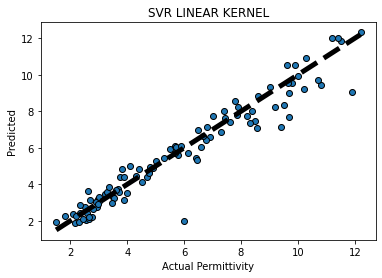

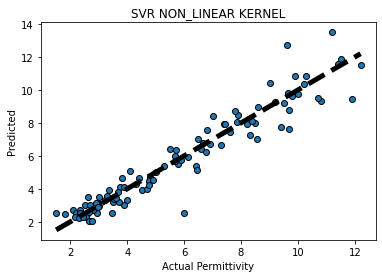

In [114]:
predicted = cross_val_predict(svr_lin, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
ax.set_xlabel("Actual Permittivity")
ax.set_ylabel("Predicted")
ax.set_title("SVR LINEAR KERNEL")
plt.show()
# predicted = cross_val_predict(svr_poly, X, y, cv=10)

# fig, ax = plt.subplots()
# ax.scatter(y, predicted, edgecolors=(0, 0, 0))
# ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
# ax.set_title("NON_LINEAR KERNEL")
# ax.set_xlabel("Actual Permittivity")
# ax.set_ylabel("Predicted")

# plt.show()

predicted = cross_val_predict(svr_rbf, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
ax.set_title("SVR NON_LINEAR KERNEL")
ax.set_xlabel("Actual Permittivity")
ax.set_ylabel("Predicted")
plt.show()


[ 9.4   3.2   5.    2.1   6.5   3.   12.2  10.    3.5   5.5   8.6   2.5
  2.6   2.98  4.1   4.3   4.5   6.15 10.2   2.94  2.2   2.33  2.17  5.68
  4.    4.8   6.    7.9   2.31  3.87  2.91  2.55  2.7   3.3   3.35  3.8
  4.4   2.62  5.7   6.8   7.    9.    9.6   3.75 11.2   3.02  6.6  10.8
  3.55  3.66  6.4   3.7   3.45  2.64  2.95  2.75  6.45 10.7   4.7   9.8
  9.9  11.9   2.8   2.35  2.97  2.45  2.65  3.9   4.78  5.8   6.9   8.2
  8.5   5.3   8.55  9.7   9.66  8.4   8.3   3.6   4.9   4.75  6.75  7.3
  7.4   7.6   7.8   7.45 11.5   9.5   9.2   9.68  5.66  6.66  7.86 10.3
 11.4   1.8   1.5   5.9 ]


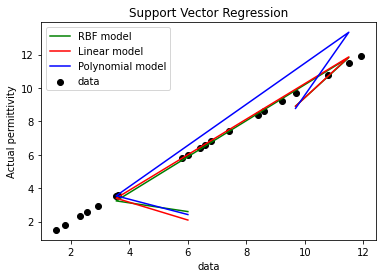

11.5

In [183]:

# look at the results
import pylab as pl

print((y.ravel()))
pl.scatter(y_test, y_test, c='k', label='data')
# pl.hold('on')
pl.plot(y_test[1:5], y_5[1:5], c='g', label='RBF model')
pl.plot(y_test[1:5], y_6[1:5], c='r', label='Linear model')
pl.plot(y_test[1:5], y_7[1:5], c='b', label='Polynomial model')
pl.xlabel('data')
pl.ylabel('Actual permittivity')
pl.title('Support Vector Regression')
pl.legend()
pl.show()
y_test[2]

In [195]:
from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor([("DT", regr_2), ("rf", rf), ("lr", linreg)])
ereg.fit(X_train, y_train)
pred4=ereg.predict(X_test)

In [196]:
cv_4_r2 = cross_val_score(ereg, X, y, cv=10,scoring="r2")
print(np.mean(cv_4_r2))


0.8358490531041769


In [197]:
cv_4_rmse=cross_val_score(ereg, X, y, cv=10,scoring="neg_mean_squared_error")
print(np.mean(cv_4_rmse)*-1)

0.7833162147434028


In [187]:
pred_range = []
for i in range(len(y_test)):
    pred_range.append([min(y_1[i],y_2[i],y_3[i],pred4[i],y_5[i],y_6[i],y_7[i]), max(y_1[i],y_2[i],y_3[i],pred4[i],y_5[i],y_6[i],y_7[i])])

print(pred_range)

[[3.4994924568636137, 3.8337887044982857], [8.781738694129295, 9.89], [10.2, 13.34113153401514], [3.2395346552267554, 3.6766666666666663], [1.9632636249116588, 2.5986031200882778], [2.89625, 3.1100305316220953], [8.805273653294131, 10.5], [3.6766666666666663, 5.86706658715817], [2.078331472500407, 2.457], [5.05, 12.89870319302505], [8.041306699133393, 9.693333333333333], [3.6766666666666663, 7.856368461875057], [8.397687001217315, 9.906540660011466], [2.7180000000000004, 2.89625], [7.15, 7.994947221565177], [6.977312323126676, 8.2], [8.841999999999999, 12.2], [1.8234133532409298, 2.406015143090137], [5.1530000000000005, 5.7], [2.135, 2.5197021814894285]]


In [124]:
y_test

array([ 3.6 ,  9.68, 11.5 ,  3.55,  6.  ,  2.94,  8.6 ,  6.4 ,  2.55,
       10.8 ,  8.4 ,  6.6 ,  9.2 ,  2.33,  7.4 ,  6.8 , 11.9 ,  1.5 ,
        5.8 ,  1.8 ])

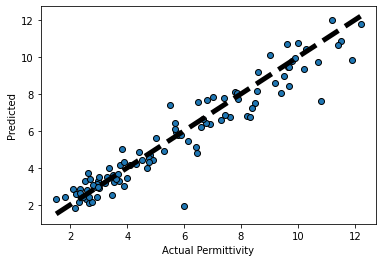

In [198]:
predicted = cross_val_predict(ereg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=5)
ax.set_xlabel("Actual Permittivity")
ax.set_ylabel("Predicted")
plt.show()




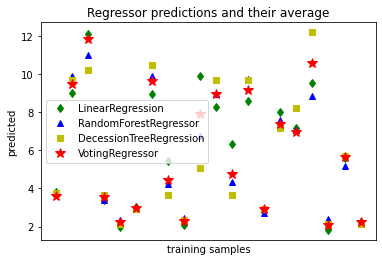

numpy.ndarray

In [43]:
plt.figure()
# plt.plot(y_test,"bo",label="Actual")

plt.plot(y_1, "gd", label="LinearRegression")
plt.plot(y_2, "b^", label="RandomForestRegressor")
plt.plot(y_3, "ys", label="DecessionTreeRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")
# plt.plot(pre, "--", ms=10, label="SVR")


plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()
# type(y_test)
type(pred4)

In [44]:
from sklearn.datasets import make_regression
n_samples_train, n_samples_test, n_features = 80, 20, 100
X, y, coef = make_regression(
    n_samples=n_samples_train + n_samples_test,
    n_features=n_features,
    n_informative=50,
    shuffle=False,
    noise=1.0,
    coef=True,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_samples_train, test_size=n_samples_test, shuffle=False, random_state=1010
)

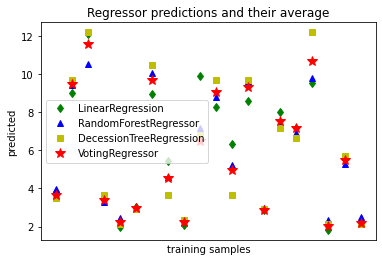

In [126]:
from sklearn import linear_model

#Compute train and test errors

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_= enet.fit(X, y).coef_
coef_

Optimal regularization parameter : 1e-05


array([6.96736379, 0.67600526, 1.55201538, 0.51806877, 0.94818466])

[0.8731428535205901,
 0.8731356875823963,
 0.8731266251301592,
 0.8731151623751768,
 0.873100625036143,
 0.8730822743938464,
 0.8730589943162229,
 0.8730295806577014,
 0.8730000392515167,
 0.8729554848948803,
 0.8728953870972063,
 0.8728191119224195,
 0.8727222309593319,
 0.8725990814114581,
 0.8724424276611648,
 0.8722430481533836,
 0.8719920896285296,
 0.8716690265527113,
 0.8712586555725104,
 0.8707390252609173,
 0.8700867772792706,
 0.8692668537737727,
 0.8682548261251326,
 0.8670286455901806,
 0.8655665975059644,
 0.8638656229668515,
 0.8619432278757051,
 0.8598417599183161,
 0.857626659082074,
 0.855380510983762,
 0.8531921199498775,
 0.8511397515031875,
 0.849277959744094,
 0.847626766458673,
 0.8474012295974099,
 0.8476788332245984,
 0.8477115494946067,
 0.8473587294161562,
 0.8464357038020247,
 0.8446946178152035,
 0.8417964884566884,
 0.8372626613406831,
 0.8304012460657667,
 0.8202036633590255,
 0.8051920584022847,
 0.7832592412232517,
 0.751461268502643,
 0.7063484509536568

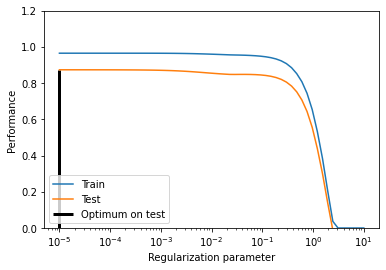

In [127]:
plt.subplot(1, 1, 1)
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,.
    label="Optimum on test",
)
plt.legend(loc="lower left")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")

train_errors
test_errors


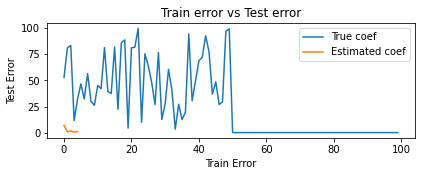

array([ 3.6 ,  9.68, 11.5 ,  3.55,  6.  ,  2.94,  8.6 ,  6.4 ,  2.55,
       10.8 ,  8.4 ,  6.6 ,  9.2 ,  2.33,  7.4 ,  6.8 , 11.9 ,  1.5 ,
        5.8 ,  1.8 ])

In [128]:

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.title("Train error vs Test error")
plt.plot(coef, label="True coef")
plt.plot(coef_, label="Estimated coef")
plt.legend()
plt.xlabel("Train Error")
plt.ylabel("Test Error")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()
y_test

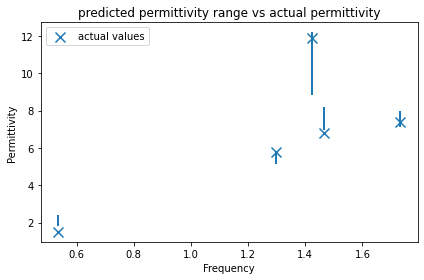

In [179]:
from matplotlib import collections  as mc
# --------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
axs.set_title('predicted permittivity range vs actual permittivity')
axs.scatter(X_test[14:19,4], y_test[14:19], s=100, marker="x", label='actual values') # actual values
lines = [
	[(X_test[14, 4], pred_range[14][0]), (X_test[14, 4], pred_range[14][1])],
 	[(X_test[15, 4], pred_range[15][0]), (X_test[15, 4], pred_range[15][1])],
 	[(X_test[16, 4], pred_range[16][0]), (X_test[16, 4], pred_range[16][1])],
 	[(X_test[17, 4], pred_range[17][0]), (X_test[17, 4], pred_range[17][1])],
 	[(X_test[18, 4], pred_range[18][0]), (X_test[18, 4], pred_range[18][1])],
 ]
lc = mc.LineCollection(lines, linewidths=2)
axs.add_collection(lc)
axs.autoscale()
axs.set_xlabel("Frequency")
axs.set_ylabel("Permittivity")
axs.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
dat.info()

In [224]:
dat.describe()

,Permittivity,df1,df2,df3,df4,df5
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.819000,0.262426,0.666201,1.235617,1.464119,1.462218
std,2.913704,0.119483,0.375240,0.620475,0.551947,0.735654
min,1.500000,0.087500,0.142400,0.380900,0.455300,0.493300
25%,3.155000,0.156800,0.380325,0.700825,1.039175,0.889175
50%,5.400000,0.250500,0.590400,1.155600,1.396550,1.302500
75%,8.225000,0.347975,0.915300,1.637775,1.893075,1.938350
max,12.200000,0.603500,2.000600,2.857200,2.782900,3.880400
